In [36]:
import pandas as pd
import numpy as np
dt=pd.read_csv('titanic-passengers.csv',';')
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [37]:
dt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [38]:
dt.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
print (dt.shape)
dt.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [40]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
total_cells = np.product(dt.shape)
missing_values_count = dt.isnull().sum()
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

8.099513655069211


In [42]:
dt['Age'].fillna(dt['Age'].mean(), inplace=True)

In [43]:
dt['Age'].isnull().sum()

0

In [44]:
dt.loc[dt.Cabin.isnull()==True,'Cabin']='G6'

In [45]:
dt['Cabin'].value_counts()

G6             691
C23 C25 C27      4
B96 B98          4
C22 C26          3
F2               3
              ... 
D10 D12          1
C104             1
E10              1
B78              1
C70              1
Name: Cabin, Length: 147, dtype: int64

In [46]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [47]:
dt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [48]:
print(dt['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [49]:
dt.loc[dt.Embarked.isnull()==True,'Embarked']='S'

In [50]:
dt.isnull().sum().sum()

0

In [51]:
print(dt['Embarked'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [52]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#dt['Sex']=encoder.fit_transform(dt['Sex'])
#dt['Survived']=encoder.fit_transform(dt['Survived'])
#dt['Embarked']=encoder.fit_transform(dt['Embarked'])
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [53]:
#oh=pd.get_dummies(dt['Cabin'])
#dt=dt.drop('Cabin',axis=1)
#dt=dt.join(oh)

In [54]:
print(dt.shape)
dt.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [55]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Age'>

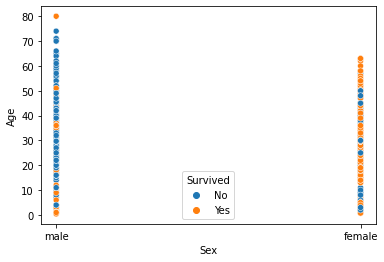

In [56]:
sns.scatterplot(x=dt['Sex'], y=dt['Age'], hue=dt['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

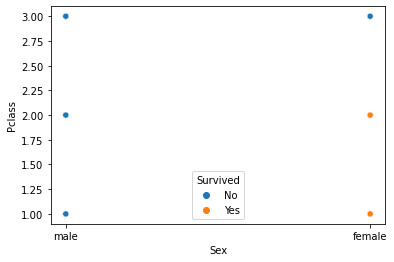

In [57]:
sns.scatterplot(x=dt['Sex'], y=dt['Pclass'], hue=dt['Survived'])

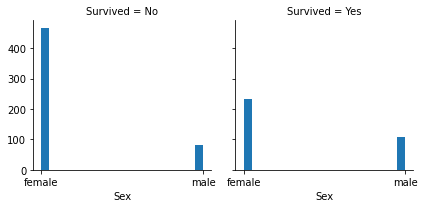

In [58]:
g=sns.FacetGrid(dt,col='Survived')
g.map(plt.hist,'Sex',bins=20)

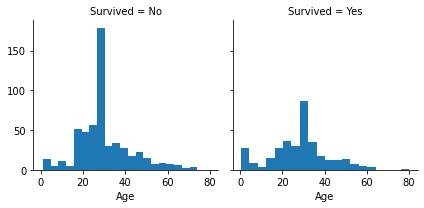

In [59]:
g=sns.FacetGrid(dt,col='Survived')
g.map(plt.hist,'Age',bins=20)

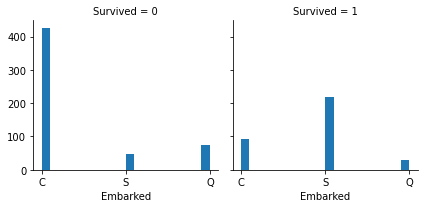

In [65]:
g=sns.FacetGrid(dt,col='Survived')
g.map(plt.hist,'Embarked',bins=20)

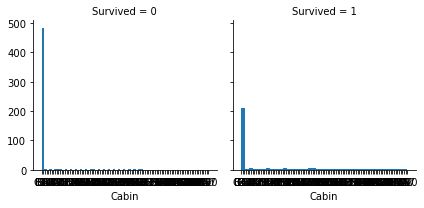

In [67]:
g=sns.FacetGrid(dt,col='Survived')
g.map(plt.hist,'Cabin',bins=20)

In [60]:
#grid = sns.FacetGrid(dt, row="Cabin", col='Survived')
#grid.map(sns.barplot, "Age", 'Sex', alpha=0.5)


In [61]:
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Survived to numerical format
dt.replace(cleanup, inplace=True)
dt[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [68]:
dt[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
#sns.jointplot(x=dt['Sex'], y=dt['Age'], kind="kde")
sns.swarmplot(x=dt['Sex'],
              y=dt['Age'])

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

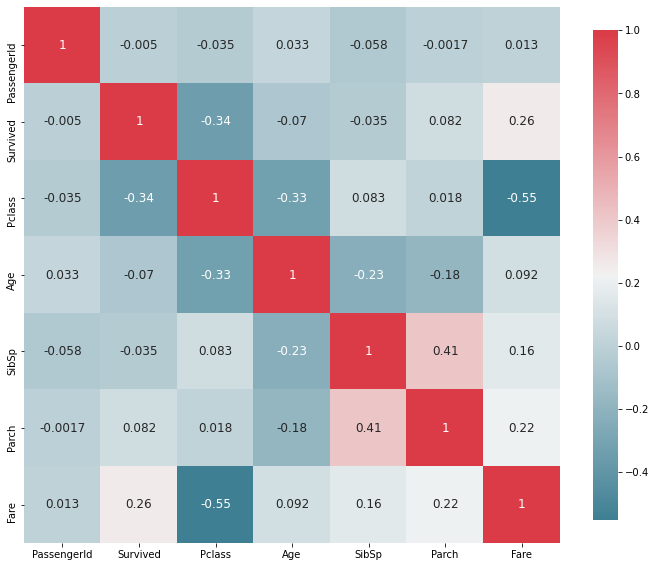

In [69]:
plot_correlation_map( dt )

this function allows to visualize the heatmaps and consequently the correlation between the different features. So, we can conclude a relation between Survived feature end Fare feature.

In [70]:
dt.drop(["Name"], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,male,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,male,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,male,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,female,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,male,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,female,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,male,29.699118,0,0,349215,7.8958,G6,S


In [6]:
Title_Dictionary = {

                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir" :"Royalty",
                    "Lady" :"Royalty",
                    "the Countess": "Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss" :"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mrs",
                    "Master" :"Master"

                    }